In [50]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy as sp

In [51]:
# Plot the directed graph
def plot_directed_graph(G):
    pos = nx.spring_layout(G, k=3)
    nx.draw_networkx(G, pos=pos, with_labels=True)
    #plt.show()
    
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel('Frequency')
    plt.ylabel('Degree')
    #plt.show()
    
def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return unique_list

In [52]:
N= 10000
kmax= N
p=1/4

In [53]:
#generate degree sequence

#degree possibilities 
values = range(1, kmax)

#chance of a node having that degree
probabilities = []

#distribution
for v in values:
    probabilities.append(p*(1-p)**v)
    
probabilities = [i/sum(probabilities) for i in probabilities]
    
deg_sequence= np.random.choice(values, kmax, p=probabilities)

if sum(deg_sequence)%2!=0:
    deg_sequence[np.random.choice(range(len(deg_sequence)))]+=1     

In [54]:
G= nx.configuration_model(deg_sequence, create_using=None, seed=None)

In [55]:
#check degree distribution... 

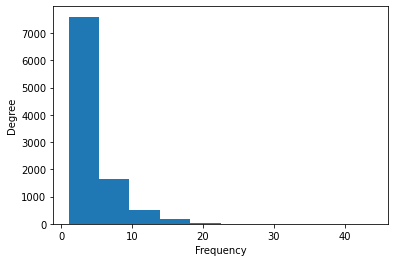

In [56]:
plot_degree_dist(G)
plt.savefig('A3Q2degdist.png')

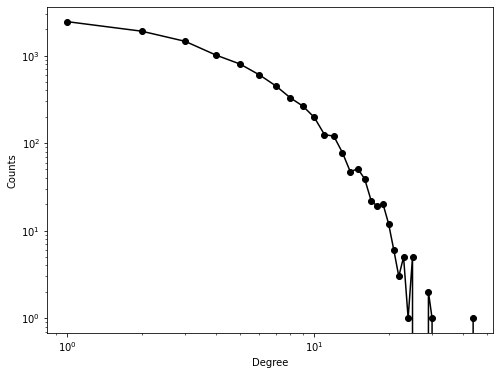

In [57]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 6))
plt.loglog(degrees[1:], degree_freq[1:],'ko-')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.show()

In [58]:
# Initial conditions (copied from Colab)

G_deg_sum = [a * b for a, b in zip(degree_freq, range(0, len(degree_freq)))]
total_degree = sum(G_deg_sum)

avg_k = sum(G_deg_sum) / G.number_of_nodes()
print(avg_k)

4.0176


In [59]:
degree_freq = nx.degree_histogram(G)

In [60]:
degree_dic = {}
for i in range(len(degree_freq)):
    degree_dic[i]= degree_freq[i]
    
#degree_dic

In [61]:
degrees_list= []

for k in degree_dic:
    degrees_list.extend([k]*degree_dic[k])
    
#degrees_list

In [62]:
#setting hyperparams

B= 0.3
a= 1.0


Iv0= 0.1
Sv0= 1.0-Iv0

I0= 0.1
S0 = 1.0-I0





In [63]:
#PART C
#using Heun's method 

def run_model(B, a, rho):
    
    
    #initial conditions

    Sk = np.zeros((len(degree_freq))) #array for expected S_k
    Ik = np.zeros((len(degree_freq))) #array for expected I_k
    Svk = np.zeros((len(degree_freq))) #array for expected Sv_k
    Ivk = np.zeros((len(degree_freq))) #array for expected Iv_k
    
    
    #a random 60% is unvaccinated
    #unvaccinated= random.sample(range(len(degree_freq)), int(0.6*len(degree_freq)))
    
    #if someone is unvaccinated, they can't be vaccinated 
    #if someone is not unvaccinated, they are vaccinated, a random 40%
    #vaccinated = [k for k in range(len(degree_freq)) if k not in unvaccinated]
    
    
    for k in range(len(degree_freq)):
        Sk[k] = degree_freq[k]*S0*0.6
        Ik[k] = degree_freq[k]*I0*0.6
        Svk[k] = degree_freq[k]*Sv0*0.4
        Ivk[k] = degree_freq[k]*Iv0*0.4
    
    S = S0
    I = I0

    Sv = Sv0
    Iv = Iv0
    
    res = []

    #how many timesteps to run for 
    h = 0.1 #timestep
    T = np.arange(100/h)


    for t in T:
    
        #calculate mean field 
    
        #unvax
        theta = 0.0
        for k in range(len(degree_freq)):
            theta += k*Ik[k]/total_degree
    
        #vax
        theta_v = 0.0
        for k in range(len(degree_freq)):
            theta_v += k*Ivk[k]/total_degree
        
        
        #set initial global quantities
        S = 0.0
        I = 0.0
        Sv = 0.0
        Iv = 0.0
    
        #run Heun's for all degree classes k
        for k in range(len(degree_freq)):
        
            #update_unvax(a,B)
        
            #Euler's method
            change_I = (Sk[k]*k*theta*B) + (Sk[k]*k*theta_v*(1-rho)*B) - (a*Ik[k])
            
            I_euler = Ik[k] + (change_I*h)
     
            change_I_euler = (Sk[k]*k*theta*B) + (Sk[k]*k*theta_v*(1-rho)*B) - (a*I_euler)
    
            #update dynamic quantity
            #Heun's
            Ik[k] += ((change_I + change_I_euler)/2)*h
            Sk[k] -= ((change_I + change_I_euler)/2)*h
    
            #update global(?)
            I+= Ik[k]
            S+= Sk[k]
        
        
        
        
            #Euler's
            change_Iv = (Svk[k]*k*theta*(1-rho)*B) + (Svk[k]*k*theta_v*(1-rho)*B) - (a*Ivk[k])
            Iv_euler = Ivk[k] + change_Iv*h
    
    
            change_Iv_euler = (Svk[k]*k*theta*(1-rho)*B) + (Svk[k]*k*theta_v*(1-rho)*B) - (a*Iv_euler)
    
            #update dynamic quantity
            #Heun's
            Ivk[k] += (((change_Iv + change_Iv_euler)/2)*h)
            Svk[k] -= (((change_Iv + change_Iv_euler)/2)*h)
    
            #update global(?)
            Iv+= Ivk[k]
            Sv+= Svk[k]
        
        
        res.append((S/G.number_of_nodes(),I/G.number_of_nodes(),Sv/G.number_of_nodes(),Iv/G.number_of_nodes()))
        #res.append(((S+Sv)/G.number_of_nodes(),(I+Iv)/G.number_of_nodes()))
        
    St,It, Sv, Iv= map(np.array, zip(*res))  
    
    return St, It, Sv, Iv

In [64]:
bottom= degrees_list[:(int(0.6*len(degrees_list)))]
top= degrees_list[int((0.6*len(degrees_list))):]

prop_top = []
prop_bottom = []

for i in range(len(degree_freq)):
    
    total_of_degree = countX(degrees_list, i)
    num_nodes_of_degree_top = countX(top, i)
    num_nodes_of_degree_bottom = countX(bottom, i)
    
    #what % of nodes of each degree are in the top/bottom?
    
    if total_of_degree !=0:
        prop_top.append(num_nodes_of_degree_top/total_of_degree)
        prop_bottom.append(num_nodes_of_degree_bottom/total_of_degree)
    else:
        prop_top.append(0.0)
        prop_bottom.append(0.0)

In [65]:
len(bottom)

6000

In [66]:
#PART D

def run_model_D(B, a, rho):
    
    
    #initial conditions
    
    #should still be the same size
    Sk = np.zeros((len(degree_freq))) #array for expected S_k
    Ik = np.zeros((len(degree_freq))) #array for expected I_k
    Svk = np.zeros((len(degree_freq))) #array for expected Sv_k
    Ivk = np.zeros((len(degree_freq))) #array for expected Iv_k
    
    for k in range(len(degree_freq)):
        Sk[k] = degree_freq[k]*S0*prop_bottom[k]
        Ik[k] = degree_freq[k]*I0*prop_bottom[k]
        Svk[k] = degree_freq[k]*Sv0*prop_top[k]
        Ivk[k] = degree_freq[k]*Iv0*prop_top[k]
    


    S = S0
    I = I0

    Sv = Sv0
    Iv = Iv0
    
    res = []

    #how many timesteps to run for 
    h = 0.1 #timestep
    T = np.arange(100/h)


    for t in T:
    
        #calculate mean field 
    
        #unvax
        theta = 0.0
        for k in range(len(degree_freq)):
            theta += k*Ik[k]/total_degree
    
        #vax
        theta_v = 0.0
        for k in range(len(degree_freq)):
            theta_v += k*Ivk[k]/total_degree
        
        
        #set initial global quantities
        S = 0.0
        I = 0.0
        Sv = 0.0
        Iv = 0.0
    
        #run Heun's for all degree classes k
        for k in range(len(degree_freq)):
        
            #update_unvax(a,B)
        
            #Euler's method
            change_I = (Sk[k]*k*theta*B) + (Sk[k]*k*theta_v*(1-rho)*B) - (a*Ik[k])
            
            I_euler = Ik[k] + (change_I*h)
     
            change_I_euler = (Sk[k]*k*theta*B) + (Sk[k]*k*theta_v*(1-rho)*B) - (a*I_euler)
    
            #update dynamic quantity
            #Heun's
            Ik[k] += ((change_I + change_I_euler)/2)*h
            Sk[k] -= ((change_I + change_I_euler)/2)*h
    
            #update global(?)
            I+= Ik[k]
            S+= Sk[k]
        
        
        
        
            #Euler's
            change_Iv = (Svk[k]*k*theta*(1-rho)*B) + (Svk[k]*k*theta_v*(1-rho)*B) - (a*Ivk[k])
            Iv_euler = Ivk[k] + change_Iv*h
    
    
            change_Iv_euler = (Svk[k]*k*theta*(1-rho)*B) + (Svk[k]*k*theta_v*(1-rho)*B) - (a*Iv_euler)
    
            #update dynamic quantity
            #Heun's
            Ivk[k] += (((change_Iv + change_Iv_euler)/2)*h)
            Svk[k] -= (((change_Iv + change_Iv_euler)/2)*h)
    
            #update global(?)
            Iv+= Ivk[k]
            Sv+= Svk[k]
        
        
        res.append((S/G.number_of_nodes(),I/G.number_of_nodes(),Sv/G.number_of_nodes(),Iv/G.number_of_nodes()))
        #res.append(((S+Sv)/G.number_of_nodes(),(I+Iv)/G.number_of_nodes()))
        
    St,It, Sv, Iv= map(np.array, zip(*res))  
    
    return St, It, Sv, Iv

In [67]:
rhos= [0.0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 0.99]
h=0.1
T = np.arange(100/h)

In [68]:
Sc = {}
Ic = {}
Svc = {}
Ivc = {}


for r in rhos:
    S,I,SV,IV= run_model(0.3, 1.0, r)
    Sc[r]=S
    Ic[r]=I
    Svc[r]=SV
    Ivc[r]=IV

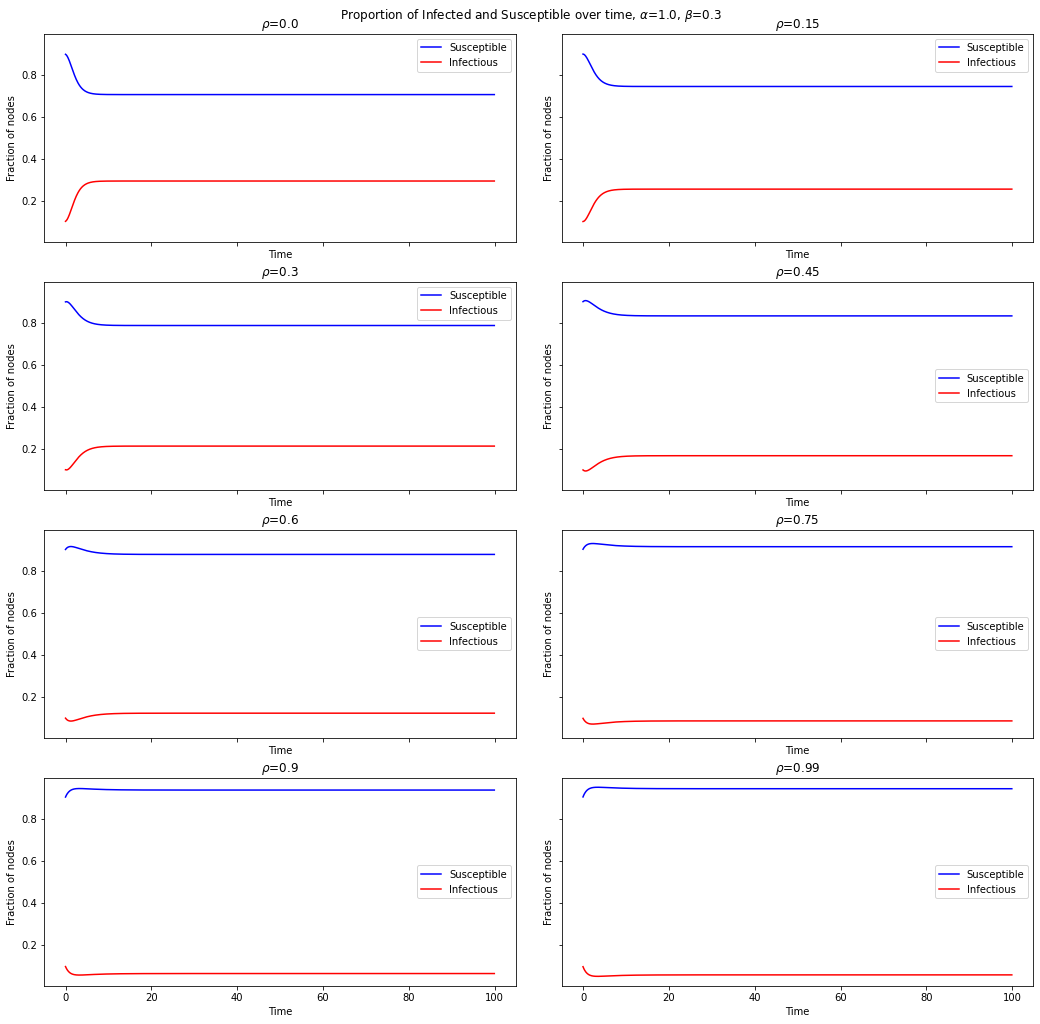

In [69]:
plt.subplots(4,2, figsize=(15,15), sharex=True, sharey=True)
plt.suptitle(r'Proportion of Infected and Susceptible over time, $\alpha$=1.0, $\beta$=0.3', x=0.5, y=0.95)
plt.tight_layout(pad=3)

for r in range(len(rhos)):
    plt.subplot(4,2,r+1)
    plt.plot(h*T, Sc[rhos[r]]+Svc[rhos[r]], 'b', label='Susceptible')
    plt.plot(h*T, Ic[rhos[r]]+Ivc[rhos[r]], 'r', label='Infectious')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("Fraction of nodes")
    plt.title(r'$\rho$={}'.format(rhos[r]))
    
plt.savefig('A3Q2C_multi_rho_a1_random.png')


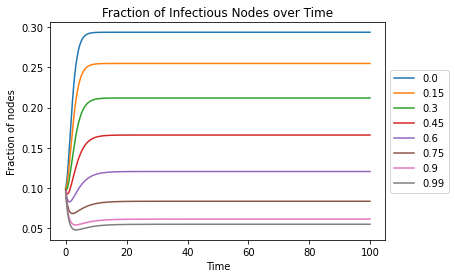

In [70]:
for r in range(len(rhos)):
    plt.plot(h*T, Ic[rhos[r]]+Ivc[rhos[r]], label=rhos[r])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("Fraction of nodes")
    plt.title('Fraction of Infectious Nodes over Time')
plt.savefig('A3Q2C_infected.png', bbox_inches='tight')

In [74]:
Sd = {}
Id = {}
Svd = {}
Ivd = {}


for r in rhos:
    S,I,SV,IV= run_model_D(0.3, 1.0, r)
    Sd[r]=S
    Id[r]=I
    Svd[r]=SV
    Ivd[r]=IV

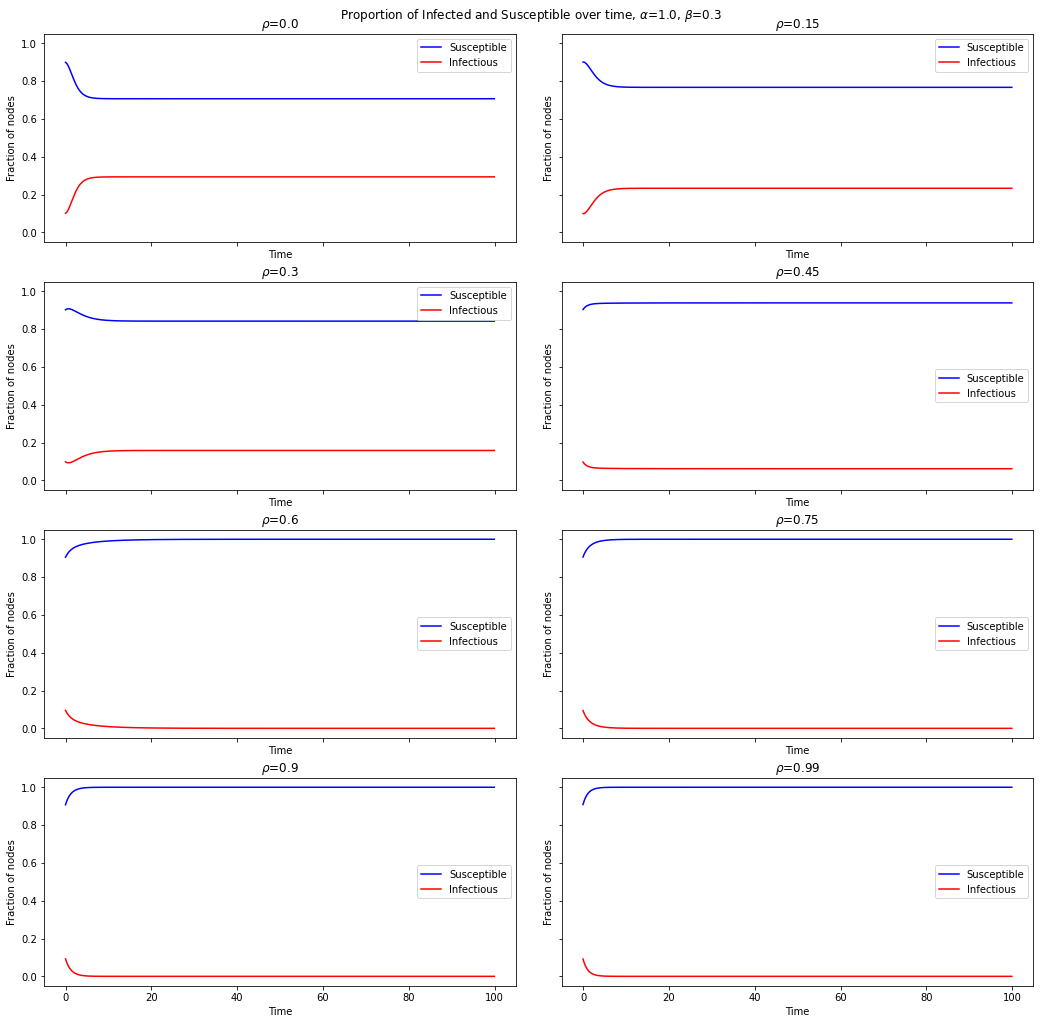

In [75]:
plt.subplots(4,2, figsize=(15,15), sharex=True, sharey=True)
plt.suptitle(r'Proportion of Infected and Susceptible over time, $\alpha$=1.0, $\beta$=0.3', x=0.5, y=0.95)
plt.tight_layout(pad=3)

for r in range(len(rhos)):
    plt.subplot(4,2,r+1)
    plt.plot(h*T, Sd[rhos[r]]+Svd[rhos[r]], 'b', label='Susceptible')
    plt.plot(h*T, Id[rhos[r]]+Ivd[rhos[r]], 'r', label='Infectious')
    plt.legend()
    #plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("Fraction of nodes")
    plt.title(r'$\rho$={}'.format(rhos[r]))
    
plt.savefig('A3Q2D_multi_rho_a1_top40.png')

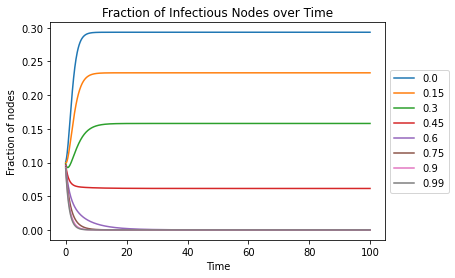

In [76]:
for r in range(len(rhos)):
    plt.plot(h*T, Id[rhos[r]]+Ivd[rhos[r]], label=rhos[r])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.yscale('log')
    plt.xlabel("Time")
    plt.ylabel("Fraction of nodes")
    plt.title('Fraction of Infectious Nodes over Time')
plt.savefig('A3Q2D_infected.png',bbox_inches='tight')

In [79]:
Id[0.6][99]+Ivd[0.6][99]

0.009312361293581895

In [80]:
Ic[0.6][99]+Ivc[0.6][99]

0.11702110916542742